In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

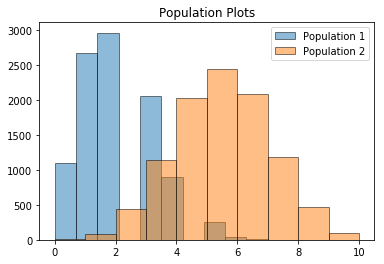

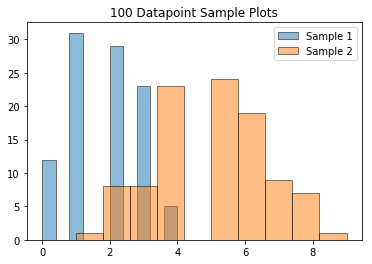

In [2]:
#create random binomial populations of size=10,000
# pop1 has p-value=0.2
# pop2 has p-value=0.5
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

#histograms of both populations
plt.hist(pop1, alpha=0.5, edgecolor='k', label='Population 1') 
plt.hist(pop2, alpha=0.5, edgecolor='k', label='Population 2')
plt.title('Population Plots')
plt.legend(loc='upper right') 
plt.show()

#create samples of 100 from each population with random sampling (replace=True)
sam1 = np.random.choice(pop1, 100, replace=True)
sam2 = np.random.choice(pop2, 100, replace=True)

#histogram of each sample
plt.hist(sam1, alpha=0.5, edgecolor='k', label='Sample 1') 
plt.hist(sam2, alpha=0.5, edgecolor='k', label='Sample 2')
plt.title('100 Datapoint Sample Plots')
plt.legend(loc='upper right') 
plt.show()

In [3]:
# calculate means and standard deviations for each population
print('Population 1 mean: {}'.format(pop1.mean()))
print('Population 2 mean: {}'.format(pop2.mean()))
print('Population 1 standard deviation: {}'.format(pop1.std()))
print('Population 2 standard deviation: {}'.format(pop2.std()))

# calculate means and standard deviations for each sample
print('Sample 1 mean: {}'.format(sam1.mean()))
print('Sample 2 mean: {}'.format(sam2.mean()))
print('Sample 1 standard deviation: {}'.format(sam1.std()))
print('Sample 2 standard deviation: {}'.format(sam2.std()))

# Compute the difference between the two sample means.
diff = sam2.mean( ) - sam1.mean()
print('Sample difference is: {}'.format(diff))


Population 1 mean: 1.9964
Population 2 mean: 5.0243
Population 1 standard deviation: 1.262135903934279
Population 2 standard deviation: 1.5800979431668154
Sample 1 mean: 1.78
Sample 2 mean: 4.95
Sample 1 standard deviation: 1.0824047302187847
Sample 2 standard deviation: 1.6635804759614121
Sample difference is: 3.17


By adjusting the sample size from 1000 to 20 I predict the histograms to look more similar to the population given more datapoints.  Also, the means for all should be relatively the same while the standard deviation should increase as the sample size goes down.


Sample 1 mean: 2.0
Sample 2 mean: 4.85
Sample 1 standard deviation: 1.174734012447073
Sample 2 standard deviation: 1.5960889699512368
Sample difference is: 2.8499999999999996


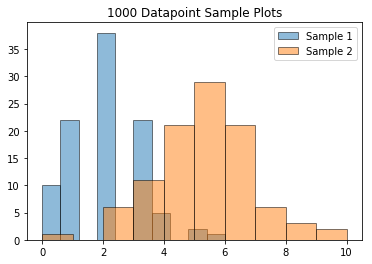

In [4]:
# adjust sample size from 100 to 1000
sam1000 = np.random.choice(pop1, 100, replace=True)
sam2000 = np.random.choice(pop2, 100, replace=True)

# calculate means and standard deviations for each new sample
print('Sample 1 mean: {}'.format(sam1000.mean()))
print('Sample 2 mean: {}'.format(sam2000.mean()))
print('Sample 1 standard deviation: {}'.format(sam1000.std()))
print('Sample 2 standard deviation: {}'.format(sam2000.std()))

# Compute the difference between the two new sample means.
diff1000 = sam2000.mean( ) - sam1000.mean()
print('Sample difference is: {}'.format(diff1000))

#histogram of each sample
plt.hist(sam1000, alpha=0.5, edgecolor='k', label='Sample 1') 
plt.hist(sam2000, alpha=0.5, edgecolor='k', label='Sample 2')
plt.title('1000 Datapoint Sample Plots')
plt.legend(loc='upper right') 
plt.show()

Sample 1 mean: 2.7
Sample 2 mean: 4.2
Sample 1 standard deviation: 1.452583904633395
Sample 2 standard deviation: 1.32664991614216
Sample difference is: 1.5


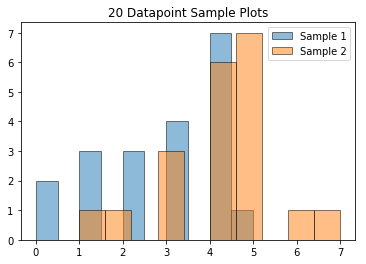

In [5]:
# adjust sample size from 100 to 20
sam10 = np.random.choice(pop1, 20, replace=True)
sam20 = np.random.choice(pop2, 20, replace=True)

# calculate means and standard deviations for each new sample
print('Sample 1 mean: {}'.format(sam10.mean()))
print('Sample 2 mean: {}'.format(sam20.mean()))
print('Sample 1 standard deviation: {}'.format(sam10.std()))
print('Sample 2 standard deviation: {}'.format(sam20.std()))

# Compute the difference between the two new sample means.
diff20 = sam20.mean( ) - sam10.mean()
print('Sample difference is: {}'.format(diff20))

#histogram of each sample
plt.hist(sam10, alpha=0.5, edgecolor='k', label='Sample 1') 
plt.hist(sam20, alpha=0.5, edgecolor='k', label='Sample 2')
plt.title('20 Datapoint Sample Plots')
plt.legend(loc='upper right') 
plt.show()

I predict that by changing the p-value of the population we will see the resulting p-value calculated from the two samples go down.  This is because the the p-value between samples is a measure of the significance related to the separation between the two samples. The lower the p-value, the more confidently we can conclude that there is a meaningful difference between the means of the two groups in the population.

# Now change population 1 p-value from 0.2 to 0.3

In [6]:
# create new population with p-value=0.3
pop1a = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1a, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

# compute t-statistic and p-value for the two samples
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=9.840065346147414, pvalue=7.681658748358116e-19)


# Now change population 1 p-value from 0.2 to 0.4

In [7]:
# create new population with p-value=0.4
pop1b = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample_1 = np.random.choice(pop1b, 100, replace=True)
sample_2 = np.random.choice(pop2, 100, replace=True)

# compute t-statistic and p-value for the two samples
from scipy.stats import ttest_ind
print(ttest_ind(sample_2, sample_1, equal_var=False))

Ttest_indResult(statistic=4.893789269306729, pvalue=2.0485797718043422e-06)


As expected we notice the p-values increase (t-statistics decrease) as the two populations increase in similarity.

# Now choose new distribution and calculate new sample means

By changing the distribution from binomial to poisson, we will still be able to apply the Central Limit Theorem as long as we select a large enough sample size.  With us being able to still apply the CLT we will see that the means of the samples pulled will be approximately equal to the mean of the population.

In [9]:
# create new population with poisson distribution and lambda=5 and lambda=7
poppoiss1 = np.random.poisson(5, 10000)
poppoiss2 = np.random.poisson(7, 10000)

# grab 100 from each population
sam1p = np.random.choice(poppoiss1, 100, replace=True)
sam2p = np.random.choice(poppoiss2, 100, replace=True)

# calculation population mean and stdev
print('Population 1 mean: {}'.format(poppoiss1.mean()))
print('Population 2 mean: {}'.format(poppoiss2.mean()))
print('Population 1 standard deviation: {}'.format(poppoiss1.std()))
print('Population 2 standard deviation: {}'.format(poppoiss2.std()))

# calculate means and standard deviations for each sample
print('Sample 1 mean: {}'.format(sam1p.mean()))
print('Sample 2 mean: {}'.format(sam2p.mean()))
print('Sample 1 standard deviation: {}'.format(sam1p.std()))
print('Sample 2 standard deviation: {}'.format(sam2p.std()))

Population 1 mean: 5.0
Population 2 mean: 6.9902
Population 1 standard deviation: 2.224454989429995
Population 2 standard deviation: 2.656972705919276
Sample 1 mean: 5.35
Sample 2 mean: 7.44
Sample 1 standard deviation: 2.2994564575133842
Sample 2 standard deviation: 2.5389761716093355
